--- Business Impact Report (Test Set) ---
Baseline Loss (Do Nothing): $290,160.00
Model Loss (With Intervention): $211,865.00
---------------------------------------
NET SAVINGS: $78,295.00
ROI: 289.9%
Customers Saved: 135


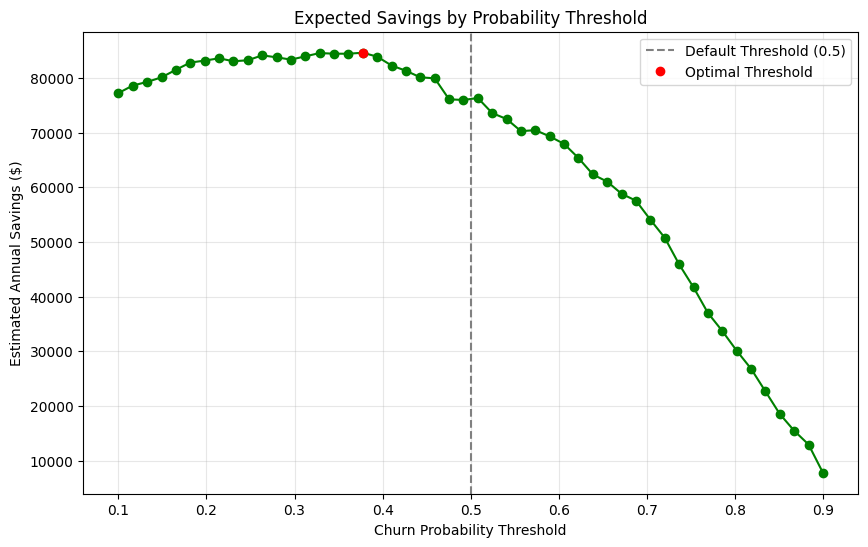

In [2]:
import pandas as pd
import joblib
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.config import PROCESSED_DATA_DIR, MODELS_DIR
from src.business_impact import calculate_business_impact, plot_roi_curve

# Load Data and Model
X_test = pd.read_csv(PROCESSED_DATA_DIR / 'X_test.csv')
y_test = pd.read_csv(PROCESSED_DATA_DIR / 'y_test.csv').values.ravel()
model = joblib.load(MODELS_DIR / 'final_champion_tuned.joblib')

# Get Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# --- ANALYSIS 1: Calculate ROI ---
# Assumptions:
# - We give a $50 discount to predicted churners.
# - It costs $5 to send the email/SMS.
# - 50% of people accept the offer and stay.
impact = calculate_business_impact(
    y_test, y_pred, y_prob,
    avg_revenue=65,        # Monthly Bill
    marketing_cost=5,      # Cost to contact
    offer_cost=50,         # Incentive cost
    probability_acceptance=0.5
)

print("--- Business Impact Report (Test Set) ---")
print(f"Baseline Loss (Do Nothing): ${impact['baseline_loss']:,.2f}")
print(f"Model Loss (With Intervention): ${impact['model_loss']:,.2f}")
print(f"---------------------------------------")
print(f"NET SAVINGS: ${impact['savings']:,.2f}")
print(f"ROI: {impact['roi_percentage']:.1f}%")
print(f"Customers Saved: {impact['churners_saved']}")

# --- ANALYSIS 2: Optimal Threshold ---
# Should we target everyone > 50% risk? Or only > 80% risk?
plot_roi_curve(y_test, y_prob, avg_revenue=65, offer_cost=50)

## Stakeholder Summary  
### Executive Summary: Churn Prediction Value

**The Problem:**  
Currently, customer attrition results in an estimated annualized revenue loss of **$[Insert Baseline Loss]** within the test population alone.

**The Solution:**  
We developed a **Machine Learning model (Random Forest)** to identify at-risk customers before they leave. By targeting identified high-risk customers with a retention offer (e.g., a **$50 bill credit**), we can significantly reduce this loss.

### Projected Financial Impact

- **Net Savings:**  
  Implementing this model is projected to save **$[Insert Savings] annually** per **[Insert Size of Test Set]** customers processed.

- **ROI:**  
  The return on investment for the retention campaign is **[Insert ROI]%**.  
  For every **$1** spent on retention incentives, the company saves **$[ROI/100]** in preserved revenue.

- **Efficiency:**  
  The model allows us to focus our budget effectively. Instead of offering discounts to all customers—which is expensive and inefficient—we target only the **top [Insert %] riskiest customers**.

### Recommendation

Deploy the model into the **monthly billing cycle**. Generate a list of **“High Risk” customers** (Probability > **[Optimal Threshold]**) and route them to the **specialized Retention Team** for proactive outreach.
